In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
df=pd.read_excel("D://vscode//jupyter notebook//Default (2).xlsx")

c:\Users\Hp\AppData\Local\Programs\Python\Python38\lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [4]:
df.sample(5)

,Unnamed: 0,default,student,balance,income
5741,5742,No,Yes,1169.420444,19879.248170
6404,6405,No,Yes,859.379690,19287.503699
4013,4014,No,No,423.430474,46000.796678
9603,9604,No,Yes,0.000000,18235.674375
718,719,No,Yes,544.139769,20056.828544


In [5]:
df.shape

(10000, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  10000 non-null  int64  
 1   default     10000 non-null  object 
 2   student     10000 non-null  object 
 3   balance     10000 non-null  float64
 4   income      10000 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 390.8+ KB


In [7]:
df.isnull().sum()

Unnamed: 0    0
default       0
student       0
balance       0
income        0
dtype: int64

In [8]:
df.describe()

,Unnamed: 0,balance,income
count,10000.00000,10000.000000,10000.000000
mean,5000.50000,835.374886,33516.981876
std,2886.89568,483.714985,13336.639563
min,1.00000,0.000000,771.967729
25%,2500.75000,481.731105,21340.462903
50%,5000.50000,823.636973,34552.644802
75%,7500.25000,1166.308386,43807.729272
max,10000.00000,2654.322576,73554.233495


(array([9667.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         333.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

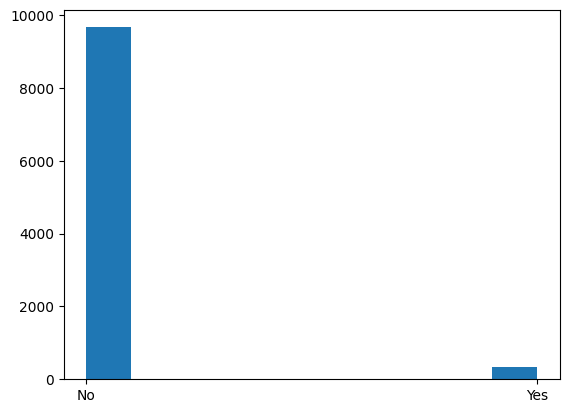

In [9]:
plt.hist(df['default'])

In [10]:
df['default'].value_counts()

default
No     9667
Yes     333
Name: count, dtype: int64

In [11]:
(df.balance==0).sum(axis=0)

499

In [12]:
df.student.value_counts()

student
No     7056
Yes    2944
Name: count, dtype: int64

In [13]:
df.default.value_counts()

default
No     9667
Yes     333
Name: count, dtype: int64

In [14]:
df.rename(columns={'default.payment.next.month':'def_pay'}, inplace=True)
df.rename(columns={'PAY_0':'PAY_1'}, inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  10000 non-null  int64  
 1   default     10000 non-null  object 
 2   student     10000 non-null  object 
 3   balance     10000 non-null  float64
 4   income      10000 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 390.8+ KB


In [16]:
df['default2'] = df.default.factorize()[0]                         
df['student2'] = df.student.factorize()[0]


In [17]:
df.head(4)

,Unnamed: 0,default,student,balance,income,default2,student2
0,1,No,No,729.526495,44361.625074,0,0
1,2,No,Yes,817.180407,12106.134700,0,1
2,3,No,No,1073.549164,31767.138947,0,0
3,4,No,No,529.250605,35704.493935,0,0


C:\Users\Hp\AppData\Local\Temp\ipykernel_24988\3702746987.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='default', y='balance', data=df, orient='v', ax=ax2, palette=c_palette)
C:\Users\Hp\AppData\Local\Temp\ipykernel_24988\3702746987.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='default', y='income', data=df, orient='v', ax=ax3, palette=c_palette)


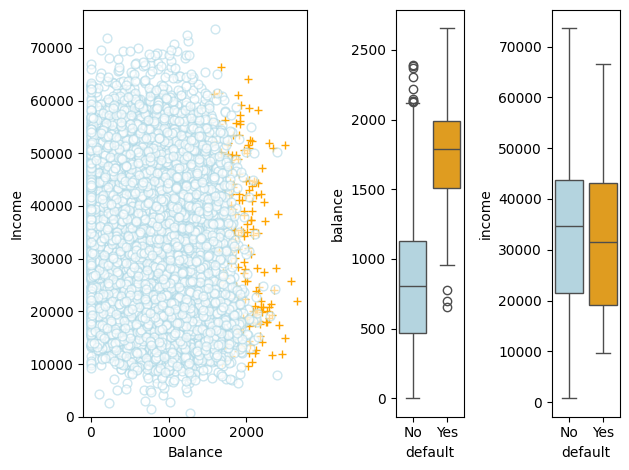

In [18]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

gs = gridspec.GridSpec(1, 4)  
ax1 = plt.subplot(gs[0,:2])  
ax2 = plt.subplot(gs[0,2:3])  
ax3 = plt.subplot(gs[0,3:4])  

ax1.scatter(df[df.default == 'Yes'].balance, df[df.default == 'Yes'].income, s=40, c='orange', marker='+', linewidths=1)  
ax1.scatter(df[df.default == 'No'].balance, df[df.default == 'No'].income, s=40, marker='o', linewidths=1, edgecolors='lightblue', facecolors='white', alpha=0.6)  

ax1.set_ylim(bottom=0)  
ax1.set_ylabel('Income')      
ax1.set_xlim(left=-100)  
ax1.set_xlabel('Balance')  

c_palette = {'No':'lightblue', 'Yes':'orange'}  
sns.boxplot(x='default', y='balance', data=df, orient='v', ax=ax2, palette=c_palette)  
sns.boxplot(x='default', y='income', data=df, orient='v', ax=ax3, palette=c_palette)  

plt.tight_layout()
plt.show()

In [19]:
X_train = df.balance.values.reshape(-1,1)         

In [20]:
X_test = np.arange(df.balance.min(), df.balance.max()).reshape(-1 ,1) 

In [21]:
y = df.default2 

In [22]:
 import sklearn.linear_model as skl_lm  

In [23]:
default_dummies = pd.get_dummies(df.default, prefix='default')
default_dummies.drop(default_dummies.columns[0], axis=1, inplace=True)
df = pd.concat([df, default_dummies], axis=1)
df.head()

,Unnamed: 0,default,student,balance,income,default2,student2,default_Yes
0,1,No,No,729.526495,44361.625074,0,0,False
1,2,No,Yes,817.180407,12106.134700,0,1,False
2,3,No,No,1073.549164,31767.138947,0,0,False
3,4,No,No,529.250605,35704.493935,0,0,False
4,5,No,No,785.655883,38463.495879,0,0,False


In [24]:
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(df['default']) 
X = df[['balance']]  
X = X.values.reshape(-1, 1)

linreg = LinearRegression()
linreg.fit(X, y_encoded)

print(linreg.coef_)
print(linreg.intercept_)

[0.00012987]
-0.07519195884622262


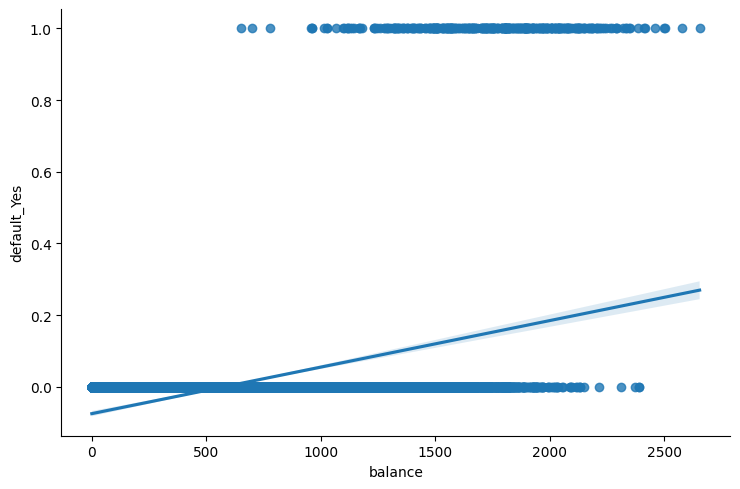

In [25]:
sns.lmplot(x='balance', y='default_Yes', data=df, aspect=1.5, fit_reg = True)

[[0.00549892]]
[-10.65132824]


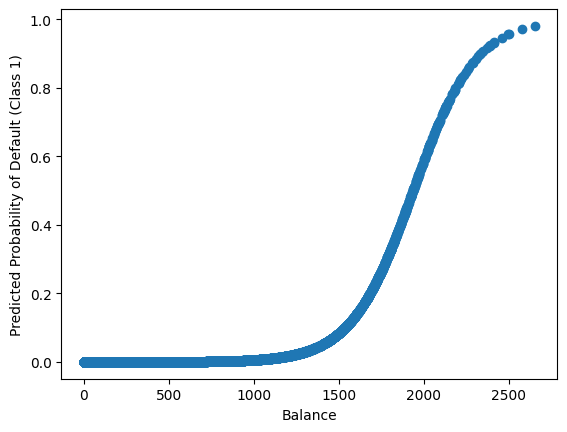

In [26]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

X = df[['balance']]  
y = df['default']    

logreg = LogisticRegression()
logreg.fit(X, y)

print(logreg.coef_)
print(logreg.intercept_)

y_pred = logreg.predict_proba(X)
plt.scatter(X, y_pred[:, 1])  
plt.xlabel('Balance')
plt.ylabel('Predicted Probability of Default (Class 1)')
plt.show()

In [27]:
y_pred

array([[9.98694319e-01, 1.30568146e-03],
       [9.97887402e-01, 2.11259754e-03],
       [9.91405252e-01, 8.59474814e-03],
       ...,
       [9.97533484e-01, 2.46651596e-03],
       [8.83240365e-01, 1.16759635e-01],
       [9.99928552e-01, 7.14476480e-05]])

In [28]:
y_pred[:,0]

array([0.99869432, 0.9978874 , 0.99140525, ..., 0.99753348, 0.88324037,
       0.99992855])

In [29]:
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size=0.30, random_state=13)

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression(class_weight='balanced')
logreg.fit(X, y)
print(logreg.coef_)
print(logreg.intercept_)

[[0.005602]]
[-7.42029855]


In [31]:
logreg.fit(xTrain, yTrain)

LogisticRegression(class_weight='balanced')

In [32]:
y_log_pred_test = logreg.predict(xTest)
y_log_pred_train = logreg.predict(xTrain)

In [33]:
y_log_pred_test.shape

(3000,)

In [34]:
y_log_pred_train.shape

(7000,)

In [35]:
y_log_pred_test

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [36]:
conf = metrics.confusion_matrix(yTest, y_log_pred_test)
conf

array([[2514,  377],
       [  22,   87]], dtype=int64)

<Axes: >

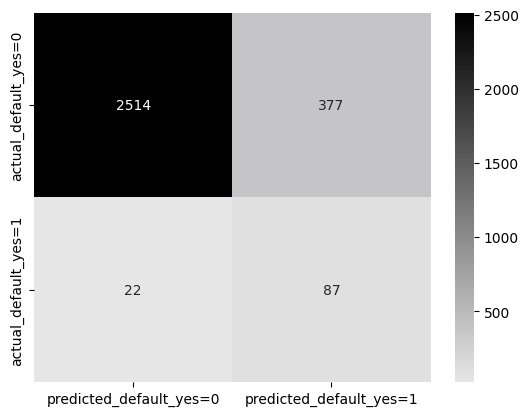

In [37]:
cmap = sns.cubehelix_palette(50, hue=0.05, rot=0, light=0.9, dark=0, as_cmap=True)
sns.heatmap(conf,cmap = cmap,xticklabels=['predicted_default_yes=0','predicted_default_yes=1'],yticklabels=['actual_default_yes=0','actual_default_yes=1'],annot=True, fmt="d")

In [38]:
confusion = metrics.confusion_matrix(yTest, y_log_pred_test)
print(confusion)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
print ("TP",TP)
print ("TN",TN)
print("FN",FN)
print ("FP",FP)

[[2514  377]
 [  22   87]]
TP 87
TN 2514
FN 22
FP 377


In [39]:
print('True', yTest.values[0:15])
print('Pred', y_log_pred_test[0:15])

True ['No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'Yes'
 'No']
Pred ['No' 'No' 'No' 'No' 'No' 'No' 'Yes' 'No' 'Yes' 'No' 'Yes' 'Yes' 'Yes'
 'Yes' 'Yes']


In [40]:
print('Accuracy_Score:', metrics.accuracy_score(yTest, y_log_pred_test))

Accuracy_Score: 0.867


In [41]:
print('Classification Error:',1 - metrics.accuracy_score(yTest, y_log_pred_test))

Classification Error: 0.133


In [42]:
from sklearn.metrics import classification_report
print(classification_report(yTest, y_log_pred_test))

              precision    recall  f1-score   support

          No       0.99      0.87      0.93      2891
         Yes       0.19      0.80      0.30       109

    accuracy                           0.87      3000
   macro avg       0.59      0.83      0.62      3000
weighted avg       0.96      0.87      0.90      3000



In [43]:
print(confusion)


[[2514  377]
 [  22   87]]


In [44]:
print("Shape of yTest:", yTest.shape)
print("Shape of y_pred:", y_pred.shape)

Shape of yTest: (3000,)
Shape of y_pred: (10000, 2)
